# Export to shapefile (and other useful formats)
MIKE IO 1D supports exporting to shapefile (and other geospatial features) via GeoPandas. To use these features, you will need to ensure GeoPandas and its dependencies are installed.

Note: it is currently only possible to export the static network. The next step is to enable adding results.


## Read res1d file into a GeoDataFrame

In [1]:
from mikeio1d import Res1D
from tests.testdata import testdata

In [2]:
res = Res1D(testdata.NetworkRiver_res1d)
res

<mikeio1d.Res1D>
Start time: 2000-02-18 00:06:00
End time: 2000-02-18 12:06:00
# Timesteps: 73
# Catchments: 0
# Nodes: 18
# Reaches: 18
# Globals: 4
0 - WaterLevel <m>
1 - Discharge <m^3/s>
2 - ManningResistanceNumber <m^(1/3)/s>
3 - FlowVelocity <m/s>
4 - FlowVelocityInStructure <m/s>
5 - FlowAreaInStructure <m^2>
6 - DischargeInStructure <m^3/s>
7 - ControlStrategyId <Integer>
8 - GateLevel <m>
9 - Variable:TwoTimeSensorGateLevel <->
10 - Water level:Sensor:s.h.river53745.34 <m>
11 - Gate level:Sensor:SensorGateLevel <m>
12 - Discharge:Sensor:SensorGauge1 <m^3/s>

In [3]:
df = res.result_network.to_geopandas()
df.head()

,id,geometry
0,"'basin_left1', 0",POINT (385951.998 5715945.461)
1,"'basin_left1', 483.74285236705026",POINT (386290.560 5715631.777)
2,"'basin_left2', 0",POINT (386336.382 5715669.783)
3,"'basin_left2', 441.71489580142429",POINT (386642.023 5715352.877)
4,"'basin_right', -10",POINT (385973.133 5716486.595)


## Basic plotting

<Axes: >

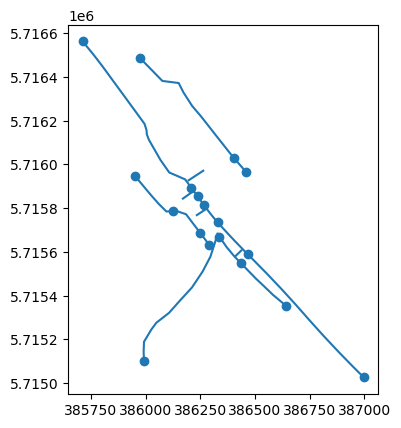

In [4]:
df.plot()

# Interactive plotting with explore

### Add an interactive plot directly in the notebook

Note: The map does not display on GitHub. You may use https://nbviewer.org/ to properly view the notebook.

In [5]:
map = df.explore(tiles="cartodb positron", tooltip=["id"], popup=True)
map

### Save your interactive map into a shareable HTML file

In [6]:
map.save("results.html")

## Export to shapefile

In [7]:
# Shapefiles require all geometries to be of the same type
df.loc[df.geometry.geom_type == "Point"].to_file("results_points.shp")
df.loc[df.geometry.geom_type == "LineString"].to_file("results_lines.shp")

## Clean up

In [8]:
from pathlib import Path
files_to_delete = Path.glob(Path.cwd(), "results*")
for f in files_to_delete:
    f.unlink()